In [139]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import legacy as legacy_optimizers
import os
import sys

In [91]:
data_dir = '/Users/khoangocle/project412/data'
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 5712 files belonging to 4 classes.


In [40]:
data_iterator = data.as_numpy_iterator()

In [41]:
# SCALE DATA

In [92]:
# VALUE OF RGB IS FROM 0-255 SO WE NORMALIZE/SCALE IT TO BE BETWEEN 0 AND 1
data = data.map(lambda x, y: (x / 255, tf.one_hot(y, depth=4)))

In [93]:
scaled_iterator = data.as_numpy_iterator()

In [160]:
batch = scaled_iterator.next()

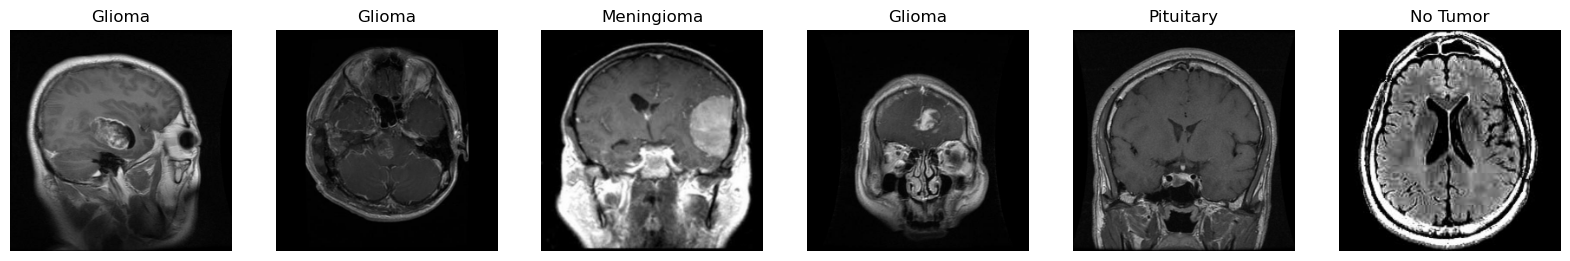

In [161]:
import matplotlib.pyplot as plt

# Ensure that only four columns are displayed
num_columns = 6
num_images = 8  # Display up to num_columns images, but no more than available

labels = [label_names[tf.argmax(label)] for label in batch[1][:num_images]]

fig, ax = plt.subplots(ncols=num_columns, figsize=(20, 20))

for idx, (img, label) in enumerate(zip(batch[0][:num_images], labels)):
    row = idx // num_columns
    col = idx % num_columns

    ax[col].imshow(img)
    ax[col].title.set_text(label)
    ax[col].axis('off')  # Optional: Turn off axis for cleaner display

plt.show()


In [135]:
# Spit data into training, validation and test set
train_size = int(len(data)*.7) 
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [136]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [49]:
# BUILD MODEL

In [163]:
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # You can adjust the dropout rate as needed

model.add(Dense(4, activation='softmax'))

In [164]:
# Can change optimizer other than adam optimizer

custom_learning_rate = 0.001  # Replace with your desired learning rate

# Create an instance of the legacy Adam optimizer with the custom learning rate
custom_legacy_adam_optimizer = legacy_optimizers.Adam(learning_rate=custom_learning_rate)
model.compile(optimizer=custom_legacy_adam_optimizer,loss=tf.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [165]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 62, 62, 32)       

In [166]:
hist = model.fit(train, epochs=20, validation_data = val)

Epoch 1/20
125/125 [==============================] - 65s 515ms/step - loss: 0.8858 - accuracy: 0.6275 - val_loss: 0.8208 - val_accuracy: 0.6736
Epoch 2/20
125/125 [==============================] - 62s 495ms/step - loss: 0.5337 - accuracy: 0.7930 - val_loss: 0.5578 - val_accuracy: 0.7682
Epoch 3/20
125/125 [==============================] - 60s 482ms/step - loss: 0.3790 - accuracy: 0.8505 - val_loss: 0.4389 - val_accuracy: 0.8125
Epoch 4/20
125/125 [==============================] - 60s 478ms/step - loss: 0.2902 - accuracy: 0.8890 - val_loss: 0.3825 - val_accuracy: 0.8550
Epoch 5/20
125/125 [==============================] - 62s 496ms/step - loss: 0.2272 - accuracy: 0.9160 - val_loss: 0.2669 - val_accuracy: 0.9054
Epoch 6/20
125/125 [==============================] - 71s 566ms/step - loss: 0.1843 - accuracy: 0.9300 - val_loss: 0.2518 - val_accuracy: 0.9158
Epoch 7/20
125/125 [==============================] - 76s 608ms/step - loss: 0.1448 - accuracy: 0.9510 - val_loss: 0.2393 - val_ac

In [ ]:
# Plot performance

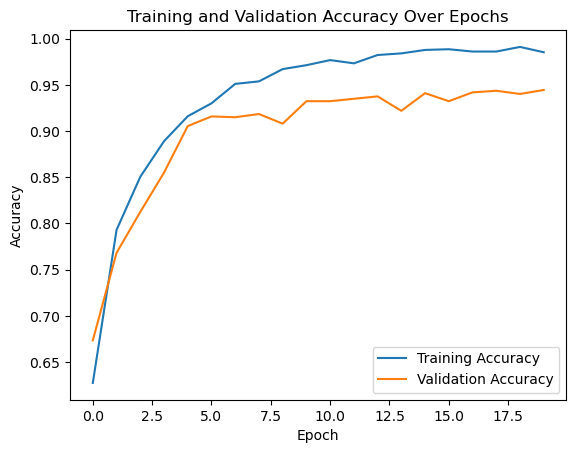

In [167]:
# Plot training and validation accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

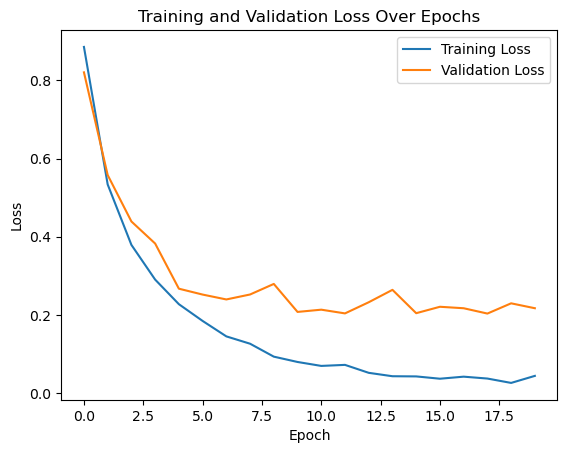

In [168]:
# Plot training and validation loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [71]:
#Evaluate

In [169]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [170]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 55ms/step


In [171]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9248658418655396, Recall:0.9232142567634583, Accuracy:0.9620535969734192


In [68]:
# Save model


In [172]:
model.save('/Users/khoangocle/project412/models/mritumormodelmulti2.keras')

In [173]:
new_model = load_model(os.path.join('/Users/khoangocle/project412/models','mritumormodelmulti2.keras'))

In [174]:

original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')
# Path to the folder containing images
folder_path = '/Users/khoangocle/project412/test_data/meningioma/'

# List all files in the folder
image_files = os.listdir(folder_path)
total_imgs = len(image_files)
correct_predictions = 0
# Iterate over each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Resize the image using TensorFlow
    resized_img = tf.image.resize(np.expand_dims(img, axis=0), (256, 256))

    # Make predictions
    predictions = new_model.predict(resized_img / 255.0)

    # Check the prediction and print the result
    predicted_class_index = np.argmax(predictions)
    if predicted_class_index == 1:
        correct_predictions+=1
    else:
        print(f'{image_file}: Predicted class is notumor')
sys.stdout = original_stdout
accuracy = correct_predictions / total_imgs
print(f'Meningioma')
print(f'Correct Prediction: {correct_predictions}')
print(f'Total images: {total_imgs}')
print(f'Accuracy rate: {accuracy * 100:.2f}%')


Meningioma
Correct Prediction: 258
Total images: 306
Accuracy rate: 84.31%


In [175]:

original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')
# Path to the folder containing images
folder_path = '/Users/khoangocle/project412/test_data/notumor/'

# List all files in the folder
image_files = os.listdir(folder_path)
total_imgs = len(image_files)
correct_predictions = 0
# Iterate over each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Resize the image using TensorFlow
    resized_img = tf.image.resize(np.expand_dims(img, axis=0), (256, 256))

    # Make predictions
    predictions = new_model.predict(resized_img / 255.0)

    # Check the prediction and print the result
    predicted_class_index = np.argmax(predictions)
    if predicted_class_index == 2:
        correct_predictions+=1
    else:
        print(f'{image_file}: Predicted class is notumor')
sys.stdout = original_stdout
accuracy = correct_predictions / total_imgs
print(f'No Tumor')
print(f'Correct Prediction: {correct_predictions}')
print(f'Total images: {total_imgs}')
print(f'Accuracy rate: {accuracy * 100:.2f}%')


No Tumor
Correct Prediction: 399
Total images: 405
Accuracy rate: 98.52%


In [176]:

original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')
# Path to the folder containing images
folder_path = '/Users/khoangocle/project412/test_data/glioma/'

# List all files in the folder
image_files = os.listdir(folder_path)
total_imgs = len(image_files)
correct_predictions = 0
# Iterate over each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Resize the image using TensorFlow
    resized_img = tf.image.resize(np.expand_dims(img, axis=0), (256, 256))

    # Make predictions
    predictions = new_model.predict(resized_img / 255.0)

    # Check the prediction and print the result
    predicted_class_index = np.argmax(predictions)
    if predicted_class_index == 0:
        correct_predictions+=1
    else:
        print(f'{image_file}: Predicted class is notumor')
sys.stdout = original_stdout
accuracy = correct_predictions / total_imgs
print(f'Glioma')
print(f'Correct Prediction: {correct_predictions}')
print(f'Total images: {total_imgs}')
print(f'Accuracy rate: {accuracy * 100:.2f}%')


Glioma
Correct Prediction: 282
Total images: 300
Accuracy rate: 94.00%


In [177]:

original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')
# Path to the folder containing images
folder_path = '/Users/khoangocle/project412/test_data/pituitary/'

# List all files in the folder
image_files = os.listdir(folder_path)
total_imgs = len(image_files)
correct_predictions = 0
# Iterate over each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Resize the image using TensorFlow
    resized_img = tf.image.resize(np.expand_dims(img, axis=0), (256, 256))

    # Make predictions
    predictions = new_model.predict(resized_img / 255.0)

    # Check the prediction and print the result
    predicted_class_index = np.argmax(predictions)
    if predicted_class_index == 3:
        correct_predictions+=1
    else:
        print(f'{image_file}: Predicted class is notumor')
sys.stdout = original_stdout
accuracy = correct_predictions / total_imgs
print(f'Pituitary')
print(f'Correct Prediction: {correct_predictions}')
print(f'Total images: {total_imgs}')
print(f'Accuracy rate: {accuracy * 100:.2f}%')


Pituitary
Correct Prediction: 296
Total images: 300
Accuracy rate: 98.67%
